In [ ]:
import pandas as pd

from google.colab import files

chukyo = pd.read_csv('/content/drive/MyDrive/IntegratedDB_DoNotTouch/Chukyo.csv')
higas = pd.read_csv('/content/drive/MyDrive/IntegratedDB_DoNotTouch/Higashisurugawan.csv')
kyushu = pd.read_csv('/content/drive/MyDrive/IntegratedDB_DoNotTouch/Kyushu.csv')
tokyo = pd.read_csv('/content/drive/MyDrive/IntegratedDB_DoNotTouch/Tokyo.csv')
sample_s = pd.read_csv('/content/drive/MyDrive/IntegratedDB_DoNotTouch/sample_submission.csv')
data_s = pd.read_csv('/content/drive/MyDrive/IntegratedDB_DoNotTouch/Data_Specification.csv')
test_f = pd.read_csv('/content/drive/MyDrive/IntegratedDB_DoNotTouch/test.csv')
chukyo_zone_features = pd.read_csv('/content/drive/MyDrive/IntegratedDB_DoNotTouch/Chukyo_zone_feature_area.csv')
higas_zone_features = pd.read_csv('/content/drive/MyDrive/IntegratedDB_DoNotTouch/Higashisurugawan_zone_feature_area.csv')
kyushu_zone_features = pd.read_csv('/content/drive/MyDrive/IntegratedDB_DoNotTouch/Kyushu_zone_feature_area.csv')
tokyo_zone_features = pd.read_csv('/content/drive/MyDrive/IntegratedDB_DoNotTouch/Tokyo_zone_feature_area.csv')
kinki_zone_features = pd.read_csv('/content/drive/MyDrive/IntegratedDB_DoNotTouch/Kinki_zone_feature_area.csv')

chukyo_copy = chukyo.copy()
higas_copy = higas.copy()
kyushu_copy = kyushu.copy()
tokyo_copy = tokyo.copy()
sample_copy = sample_s.copy()
data_copy = data_s.copy()
test_copy = test_f.copy()
chukyo_zone_features_copy = chukyo_zone_features.copy()
higas_zone_features_copy = higas_zone_features.copy()
kyushu_zone_features_copy = kyushu_zone_features.copy()
tokyo_zone_features_copy = tokyo_zone_features.copy()
kinki_zone_features_copy = kinki_zone_features.copy()

import pandas as pd

df = pd.DataFrame(data_copy)

cities = ['Tokyo', 'Chukyo']
labels = ['Occupation', 'Trip Type']

tokyo_occupation = df[(df['City'] == cities[0]) & (df['Type'] == labels[0])]
tokyo_trip = df[(df['City'] == cities[0]) & (df['Type'] == labels[1])]

chukyo_occupation = df[(df['City'] == cities[1]) & (df['Type'] == labels[0])]
chukyo_trip = df[(df['City'] == cities[1]) & (df['Type'] == labels[1])]

occupation = df[(df['Type'] == labels[0])]
trip = df[(df['Type'] == labels[1])]

# Get unique values in the 'Category' column and assign unique integers
occupation['Occupation_Encoded'] = pd.factorize(occupation['Description'])[0]
trip['Trip_Encoded'] = pd.factorize(trip['Description'])[0]

occupation = occupation.drop('City', axis=1)
occupation = occupation.drop('Type', axis=1)
occupation = occupation.drop('Code', axis=1)

trip = trip.drop('Code', axis=1)
trip = trip.drop('City', axis=1)
trip = trip.drop('Type', axis=1)

tokyo_occupation.rename(columns={'Code': 'Occupation'}, inplace=True)
tokyo_trip.rename(columns={'Code': 'Trip_type'}, inplace=True)

chukyo_occupation.rename(columns={'Code': 'Occupation'}, inplace=True)
chukyo_trip.rename(columns={'Code': 'Trip_type'}, inplace=True)

# Convert to int
tokyo_copy['Occupation'] = tokyo_copy['Occupation'].astype(int)
chukyo_copy['Occupation'] = chukyo_copy['Occupation'].astype(int)

tokyo_copy['Trip_type'] = tokyo_copy['Trip_type'].astype(int)
chukyo_copy['Trip_type'] = chukyo_copy['Trip_type'].astype(int)

tokyo_occupation['Occupation'] = tokyo_occupation['Occupation'].astype(int)
chukyo_occupation['Occupation'] = chukyo_occupation['Occupation'].astype(int)

tokyo_trip['Trip_type'] = tokyo_trip['Trip_type'].astype(int)
chukyo_trip['Trip_type'] = chukyo_trip['Trip_type'].astype(int)

tokyo_modified = pd.merge(tokyo_copy, tokyo_occupation, on='Occupation', how='inner')
tokyo_modified = tokyo_modified.drop('Occupation', axis=1)
tokyo_modified = tokyo_modified.drop('Type', axis=1)
tokyo_modified = tokyo_modified.drop('City', axis=1)
tokyo_modified.rename(columns={'Description': 'Occupation'}, inplace=True)

chukyo_modified = pd.merge(chukyo_copy, chukyo_occupation, on='Occupation', how='inner')
chukyo_modified = chukyo_modified.drop('Occupation', axis=1)
chukyo_modified = chukyo_modified.drop('Type', axis=1)
chukyo_modified = chukyo_modified.drop('City', axis=1)
chukyo_modified.rename(columns={'Description': 'Occupation'}, inplace=True)

tokyo_modified = pd.merge(tokyo_modified, tokyo_trip, on='Trip_type', how='inner')
tokyo_modified = tokyo_modified.drop('Trip_type', axis=1)
tokyo_modified.rename(columns={'Description': 'Trip_type'}, inplace=True)
tokyo_modified = tokyo_modified.drop('Type', axis=1)

chukyo_modified = pd.merge(chukyo_modified, chukyo_trip, on='Trip_type', how='inner')
chukyo_modified = chukyo_modified.drop('Trip_type', axis=1)
chukyo_modified.rename(columns={'Description': 'Trip_type'}, inplace=True)
chukyo_modified = chukyo_modified.drop('Type', axis=1)

tokyo_features = tokyo_zone_features_copy.rename(columns={'ZONE_ID': 'Origin'})
chukyo_features = chukyo_zone_features_copy.rename(columns={'ZONE_ID': 'Destination'})

tokyo_modified = pd.merge(tokyo_modified, tokyo_features, on='Origin', how='inner')
chukyo_modified = pd.merge(chukyo_modified, chukyo_features, on='Destination', how='inner')

tokyo_modified.rename(columns={'T000918002': 'Number of business establishments (secondary sector of industry)', 'T000918006' : 'Number of employees (secondary sector of industry)', 'T000918021' : 'Number of business establishments (tertiary sector of industry)', 'T000918025' : 'Number of employees (tertiary sector of industry)', 'T000847001' : 'Night Population' }, inplace=True)
chukyo_modified.rename(columns={'T000918002': 'Number of business establishments (secondary sector of industry)', 'T000918006' : 'Number of employees (secondary sector of industry)', 'T000918021' : 'Number of business establishments (tertiary sector of industry)', 'T000918025' : 'Number of employees (tertiary sector of industry)', 'T000847001' : 'Night Population' }, inplace=True)

occupation_rename = occupation.rename(columns={'Description': 'Occupation'})

tokyo_modified = pd.merge(tokyo_modified, occupation_rename, on='Occupation', how='inner')
chukyo_modified = pd.merge(chukyo_modified, occupation_rename, on='Occupation', how='inner')

trip_rename = trip.rename(columns={'Description': 'Trip_type'})

tokyo_modified = pd.merge(tokyo_modified, trip_rename, on='Trip_type', how='inner')
chukyo_modified = pd.merge(chukyo_modified, trip_rename, on='Trip_type', how='inner')

chukyo_modified = chukyo_modified.drop_duplicates()

In [ ]:
tokyo_modified.head()

,Pid,Departure_time,Gender,Age,Origin,Destination,Occupation,City,Trip_type,Number of business establishments (secondary sector of industry),Number of employees (secondary sector of industry),Number of business establishments (tertiary sector of industry),Number of employees (tertiary sector of industry),Night Population,Occupation_Encoded,Trip_Encoded
0,264045,2008-10-01 09:00:00,2,10,11412,11414,Managers,Tokyo,To Work,37.423107,246.145385,186.062332,2443.218732,11362.425603,8,0
1,264045,2008-10-01 09:00:00,2,10,11412,11414,Managers,Tokyo,To Work,37.423107,246.145385,186.062332,2443.218732,11362.425603,8,0
2,264045,2008-10-01 09:00:00,2,10,11412,11414,Managers,Tokyo,To Work,37.423107,246.145385,186.062332,2443.218732,11362.425603,8,0
3,264045,2008-10-01 09:00:00,2,10,11412,11414,Managers,Tokyo,To Work,37.423107,246.145385,186.062332,2443.218732,11362.425603,8,0
4,264045,2008-10-01 09:00:00,2,10,11412,11414,Managers,Tokyo,To Work,37.423107,246.145385,186.062332,2443.218732,11362.425603,8,0


*Reading Files from the drive and creating a copy of each DS*

In [ ]:
#reading the text file
data_path = '/content/drive/MyDrive/IntegratedDB_DoNotTouch/feature_description.txt'

with open(data_path) as fid:
    data = "Dummy String"
    while data:
        data = fid.readline()
        # print(data)

In [ ]:
chukyo_zone_features_copy

,ZONE_ID,T000918002,T000918006,T000918021,T000918025,T000847001
0,101,110.201078,1567.983748,1158.271504,16626.211530,12235.620695
1,102,41.703371,653.904184,374.159997,4881.315941,12608.479944
2,103,73.057528,633.986865,904.778443,6772.286700,10553.917939
3,104,103.556282,752.326868,1211.353663,6139.312120,11735.317641
4,105,74.243053,828.062695,556.774100,6626.146379,14287.118210
...,...,...,...,...,...,...
1004,30902,5.446999,13.398096,124.743676,111.869508,928.256729
1005,30903,10.065273,95.877697,58.593914,729.539923,1534.266845
1006,30904,2.425920,5.439357,40.480383,62.413406,297.431474
1007,30905,7.673118,50.248633,159.546493,395.828934,1501.127641


In [ ]:
chukyo_zone_features_copy['Destination_New'] =  range(0, 1009)

In [ ]:
czp = chukyo_zone_features_copy[['Destination_New', 'ZONE_ID']]
czp.rename(columns={'ZONE_ID': 'Destination'}, inplace=True)

<ipython-input-5-70193c7c7148>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  czp.rename(columns={'ZONE_ID': 'Destination'}, inplace=True)


In [ ]:
czp =czp.drop_duplicates()

In [ ]:
chukyo_modified = pd.merge(chukyo_modified, czp, on='Destination', how='inner')
len(chukyo_modified)

205435

In [ ]:
chukyo_modified.head()

,Pid,Departure_time,Gender,Age,Origin,Destination,Occupation,City,Trip_type,Number of business establishments (secondary sector of industry),Number of employees (secondary sector of industry),Number of business establishments (tertiary sector of industry),Number of employees (tertiary sector of industry),Night Population,Occupation_Encoded,Trip_Encoded,Destination_New
0,176887,2011/10/03 09:30:00,2,11,1507,1503,Services,Chukyo,To Cram/Private School,30.464779,185.587571,252.796691,1391.760649,7920.976128,3,18,231
1,175380,2011/10/03 17:40:00,2,1,1512,1503,Preschoolers Elementary and Middle School Stud...,Chukyo,To Cram/Private School,30.464779,185.587571,252.796691,1391.760649,7920.976128,10,18,231
2,175141,2011/10/03 16:15:00,2,2,1502,1503,Preschoolers Elementary and Middle School Stud...,Chukyo,To Cram/Private School,30.464779,185.587571,252.796691,1391.760649,7920.976128,10,18,231
3,176613,2011/10/03 16:40:00,2,1,1504,1503,Preschoolers Elementary and Middle School Stud...,Chukyo,To Cram/Private School,30.464779,185.587571,252.796691,1391.760649,7920.976128,10,18,231
4,177736,2011/10/03 15:20:00,1,1,1507,1503,Preschoolers Elementary and Middle School Stud...,Chukyo,To Cram/Private School,30.464779,185.587571,252.796691,1391.760649,7920.976128,10,18,231


In [ ]:
chukyo_modified['Departure_time'] = pd.to_datetime(chukyo_modified['Departure_time'])
chukyo_modified['Departure_time'] = chukyo_modified['Departure_time'].dt.time

In [ ]:
chukyo_modified = chukyo_modified.sort_values(by='Departure_time', ascending=True)

In [ ]:
# Convert the 'TimeOnly' column to a string with a custom format
chukyo_modified['Departure_time'] = chukyo_modified['Departure_time'].apply(lambda x: x.strftime('%H'))

In [ ]:
# Creating training and testing sets.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

chukyo_df = pd.DataFrame(chukyo_modified)

# X = pd.DataFrame(data.data, columns=data.feature_names)
# y = (data.target == 0).astype(int)  # Binary classification: Setosa vs. Not Setosa
result = chukyo_df['Destination_New'].values
input = chukyo_df.drop('Destination_New', axis=1, inplace=False)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(chukyo_df, result, test_size=0.2, random_state=42)


In [ ]:
input.shape

(205435, 16)

In [ ]:
X_train = pd.DataFrame(input.iloc[:, [0, 1, 2, 3, 4, 9, 10, 11, 12, 13, 14, 15]])
X_test = pd.DataFrame(X_test.iloc[:, [0, 1, 2, 3, 4, 9, 10, 11, 12, 13, 14, 15]])

y_train = pd.DataFrame(result)

Cat boost

In [ ]:
!pip install catboost
!pip install --upgrade catboost

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
X_train['Departure_time'] = le.fit_transform(X_train['Departure_time'].astype(str))
# X_train['Occupation'] = le.fit_transform(X_train['Occupation'].astype(str))
# X_train['City'] = le.fit_transform(X_train['City'].astype(str))
# X_train['Trip_type'] = le.fit_transform(X_train['Trip_type'].astype(str))
X_train['Number of business establishments (secondary sector of industry)'] = le.fit_transform(X_train['Number of business establishments (secondary sector of industry)'].astype(str))
X_train['Number of employees (secondary sector of industry)'] = le.fit_transform(X_train['Number of employees (secondary sector of industry)'].astype(str))
X_train['Number of business establishments (tertiary sector of industry)'] = le.fit_transform(X_train['Number of business establishments (tertiary sector of industry)'].astype(str))
X_train['Number of employees (tertiary sector of industry)'] = le.fit_transform(X_train['Number of employees (tertiary sector of industry)'].astype(str))
X_train['Night Population'] = le.fit_transform(X_train['Night Population'].astype(str))


# Make predictions on the test set
X_test['Departure_time'] = le.fit_transform(X_test['Departure_time'].astype(str))
# X_test['Occupation'] = le.fit_transform(X_test['Occupation'].astype(str))
# X_test['City'] = le.fit_transform(X_test['City'].astype(str))
# X_test['Trip_type'] = le.fit_transform(X_test['Trip_type'].astype(str))
X_test['Number of business establishments (secondary sector of industry)'] = le.fit_transform(X_test['Number of business establishments (secondary sector of industry)'].astype(str))
X_test['Number of employees (secondary sector of industry)'] = le.fit_transform(X_test['Number of employees (secondary sector of industry)'].astype(str))
X_test['Number of business establishments (tertiary sector of industry)'] = le.fit_transform(X_test['Number of business establishments (tertiary sector of industry)'].astype(str))
X_test['Number of employees (tertiary sector of industry)'] = le.fit_transform(X_test['Number of employees (tertiary sector of industry)'].astype(str))
X_test['Night Population'] = le.fit_transform(X_test['Night Population'].astype(str))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# # Step 3: Load Data
# X, y = load_your_data_here()

# # Step 4: Split the Data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# categorical_features_indices = [7, 8, 9]

# # Step 5: Create a CatBoost dataset
train_data = Pool(data=X_train, label=y_train)
test_data = Pool(data=X_test, label=y_test)

# Ensure that the classes in the test set are also present in the training set
missing_classes = set(np.unique(y_test)) - set(np.unique(y_train))
if missing_classes:
    raise ValueError(f"Missing classes in the training set: {missing_classes}")

# Step 6: Initialize the CatBoost classifier
model = CatBoostClassifier(iterations=2,
                           depth=2,
                           loss_function='MultiClass')

# Step 7: Train the model
model.fit(train_data, eval_set=test_data)

# Step 8: Evaluate the model
predictions = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

# Step 9: Parameter Tuning (Optional)
# Perform hyperparameter tuning if needed

# Step 10: Deploy the Model (Optional)
# Deploy the model for making predictions on new data



Learning rate set to 0.5


In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

categorical_features_indices = [7, 8, 9]

# # Step 3: Load Data
# X, y = load_your_data_here()

# # Step 4: Split the Data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create a CatBoost dataset
train_data = Pool(data=X_train, label=y_train, cat_features=categorical_features_indices)
test_data = Pool(data=X_test, label=y_test, cat_features=categorical_features_indices)

# Step 6: Define the CatBoost classifier
model = CatBoostClassifier(cat_features=categorical_features_indices)

# Step 7: Define the hyperparameters to tune
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# Step 8: Define the search strategy
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(accuracy_score), cv=3)

# Step 9: Perform the hyperparameter tuning
grid_search.fit(X_train, y_train, cat_features=categorical_features_indices)

# Step 10: Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Step 11: Train the model with the best hyperparameters
best_model = CatBoostClassifier(cat_features=categorical_features_indices, **best_params)
best_model.fit(train_data, eval_set=test_data, early_stopping_rounds=50, verbose=100)

# Step 12: Evaluate the best model
predictions = best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, predictions)}")

In [ ]:
# Create and train an XGBoost classifier for multiclass classification
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
X_train['Departure_time'] = le.fit_transform(X_train['Departure_time'].astype(str))
X_train['Occupation'] = le.fit_transform(X_train['Occupation'].astype(str))
X_train['City'] = le.fit_transform(X_train['City'].astype(str))
X_train['Trip_type'] = le.fit_transform(X_train['Trip_type'].astype(str))
model = xgb.XGBClassifier(objective="multi:softprob", num_class=1006)  # "multi:softprob" for multiclass
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
X_test['Departure_time'] = le.fit_transform(X_test['Departure_time'].astype(str))
X_test['Occupation'] = le.fit_transform(X_test['Occupation'].astype(str))
X_test['City'] = le.fit_transform(X_test['City'].astype(str))
X_test['Trip_type'] = le.fit_transform(X_test['Trip_type'].astype(str))
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report

# class_names = data.target_names
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
print(f'Recall: {recall:.2f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print(f'F1 Score: {f1:.2f}')

# Display classification report
# print('Classification Report:')
# print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

In [ ]:
# FOR REFERENCE OF HYPER PARAMETER TUNNING.

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


# Create an XGBoost classifier
model = xgb.XGBClassifier(objective="multi:softprob", num_class=1009)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=5, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a model with the best hyperparameters
best_model = xgb.XGBClassifier(objective="multi:softprob", num_class=3, **best_params)
best_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Hyperparameters:", accuracy)


In [ ]:
# Import the necessary libraries
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Multiclass classification

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an XGBoost classifier for multiclass classification
model = xgb.XGBClassifier(objective="multi:softprob", num_class=3)  # "multi:softprob" for multiclass
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_names = data.target_names
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


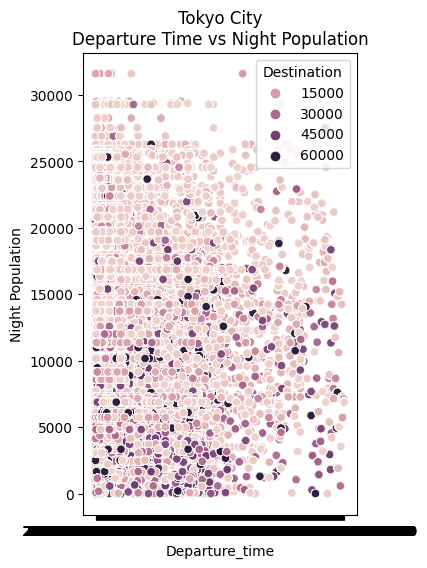

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots for three pairs of features
plt.figure(figsize=(12, 6))

headval = 500000

plt.subplot(1, 3, 1)
plt.title("Tokyo City\nDeparture Time vs Night Population")
sns.scatterplot(data=tokyo_modified.head(headval), x="Departure_time", y="Night Population", hue="Destination")

plt.show()

In [ ]:
plt.subplot(1, 2, 1)
plt.title("Tokyo City\nDeparture Time vs Night Population")
sns.scatterplot(data=tokyo_modified.head(headval), x="Departure_time", y="Night Population", hue="Destination")

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


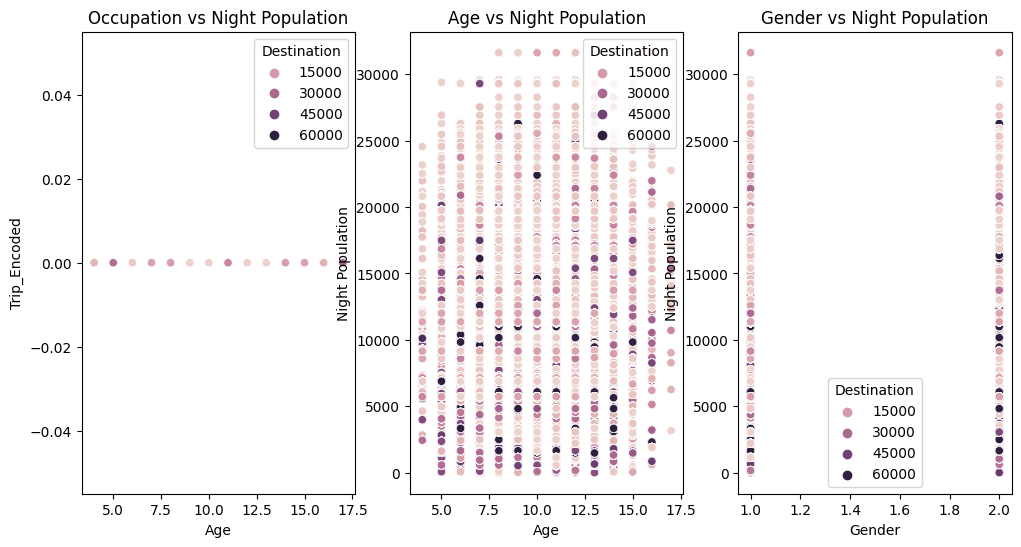

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots for three pairs of features
plt.figure(figsize=(12, 6))

headval = 500000

plt.subplot(1, 3, 1)
sns.scatterplot(data=tokyo_modified.head(headval), x="Age", y="Trip_Encoded", hue="Destination")
plt.title("Occupation vs Night Population")


plt.subplot(1, 3, 2)
sns.scatterplot(data=tokyo_modified.head(headval), x="Age", y="Night Population", hue="Destination")
plt.title("Age vs Night Population")


plt.subplot(1, 3, 3)
sns.scatterplot(data=tokyo_modified.head(headval), x="Gender", y="Night Population", hue="Destination")
plt.title("Gender vs Night Population")

# plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plot_data = pd.DataFrame(chukyo_modified)
plt.figure(figsize=(24, 12))

# plt.subplot(1, 1, 1)
bp = sns.histplot(x="Age", y="Occupation", data=plot_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation=45, ha="right")
# plt.title("Night Population Distribution by Trip Type at Hour 1")
plt.xlabel("Age")
plt.ylabel("Occupation")

plt.show()

# plt.subplot(2, 1, 1)
bp = sns.histplot(x="Departure_time", y="Occupation", data=chukyo_modified)
# bp.set_xticklabels(bp.get_xticklabels(), rotation=45, ha="right")
plt.xlabel("Age")
plt.ylabel("Occupation")
plt.show()

# plt.subplot(3, 1, 1)
bp = sns.histplot(x="Departure_time", y="Trip_type", data=plot_data)
# bp.set_xticklabels(bp.get_xticklabels(), rotation=45, ha="right")
plt.title("Night Population Distribution by Trip Type at Hour 1")
plt.xlabel("Departure_time")
plt.ylabel("Trip type")

plt.show()

In [ ]:
temp = chukyo_modified.rename(columns={'Number of business establishments (secondary sector of industry)': 'No. of II sector business.'}, inplace=False)
temp = temp.rename(columns={'Number of employees (secondary sector of industry)': 'Employees in II business'}, inplace=False)
temp = temp.rename(columns={'Number of business establishments (tertiary sector of industry)': 'No. of III sector business.'}, inplace=False)
temp = temp.rename(columns={'Number of employees (tertiary sector of industry)': 'Employees in III business'}, inplace=False)

In [ ]:
temp['Departure_time'] = pd.to_datetime(chukyo_modified['Departure_time'])


temp['Departure_time'] = temp['Departure_time'].dt.hour

# temp['Departure_time'] = temp['Departure_time'].dt.hour

In [ ]:
correlation_matrix1 = temp.corr()
plt.title("Chukyo City\n HeatMap of Correlation Matrix")
sns.heatmap(correlation_matrix1, annot=False, cmap="coolwarm")